In [41]:
from utils import search_images_ddg
from fastdownload import download_url
from PIL import Image
from pathlib import Path
from fastcore.all import *
from fastai.vision.all import *




In [42]:
# Show that i actually importe dthe function. I did this to compare the max_images parameter fromt he 
# course video.
search_images_ddg

<function utils.search_images_ddg(term, max_images=200)>

In [43]:
img = search_images_ddg('grizzly bear')
len(img)

Searching for 'grizzly bear'


200

In [44]:

dest = 'images/grizzly.jpg'
download_url(img[0], dest)

Path('images/grizzly.jpg')

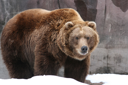

In [45]:
bear_image = Image.open(dest)
size = (128, 128)
bear_image.thumbnail(size)
bear_image

This seems to have worked nicely, so let's use fastai's download_images to download all the URLs for each of our search terms. We'll put each in a separate folder:



In [46]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [48]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)
     


Searching for 'grizzly bear'
Searching for 'black bear'
Searching for 'teddy bear'


In [50]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [58]:
# Documentation for verify_images
doc(verify_images)

## Getting Help in Jupyter Notebooks

In [59]:
# Documentation for verify_images
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      ~/anaconda3/lib/python3.11/site-packages/fastai/vision/utils.py
Type:      function

In [60]:
# Documentation for verify_images
?verify_images

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      ~/anaconda3/lib/python3.11/site-packages/fastai/vision/utils.py
Type:      function